**Nash Morrison is Responsible for the entirety of this notebook. <li/>Comments
  explain the code process as best as possible,<li> Specific variable names are used to make reading the code as easy as possible.<li/>**

*E-Signed: Nash William Morrison (Nov 6, 2024)*

# Spotify Dataset - A Focus On Valence:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

In [ ]:
# Unmount and flush our google drive when we are all finished with examining.
from google.colab import drive
drive.flush_and_unmount(timeout_ms=24*60*60*100)

## Setting & Organizing Our DataFrame

In [ ]:
## Mounting Dataset from Google Drive & Other Vital Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import precision_score, recall_score, f1_score

# Pulling dataset from our google drive
drive.mount('/content/drive',force_remount=True)
spotify = pd.read_csv("/content/drive/MyDrive/DM-Project-1/spotify-dataset.csv")

## Dropping any NULL values in the data
spotify.dropna()
spotify.drop_duplicates()

## Specific Columns w/ its respective rows dropped from our DF
#  Ultimately, we are focusing on Valence
spotify.drop([
              'Unnamed: 0',
                'track_id',
                 'artists',
              'album_name',
              'track_name',
              'popularity',
             'duration_ms',
                'explicit',
                     'key',
                'loudness',
                    'mode',
             'speechiness',
            'acousticness',
        'instrumentalness',
                'liveness',
                         ], axis=1, inplace=True)

## Just in case we need the columns for something down the road
# Converting our Indexed columns to an array of columns
columns = spotify.columns.to_numpy()

Mounted at /content/drive


## Establishing DataFrames with Pandas and Numpy

In [ ]:
#                  Contain all of a genre into one variable.
#                     Picks Initially From favoritism
#__________________________Separation by Genre_________________________________#
## We look at our spotify dataframe, we then look in that spotify dataframe
#  for our track track genre classifier, and then any strings that contain jazz,
#  disney, or metal will be placed in its own separate dataframe variable

jazz    =  spotify[spotify['track_genre'].str.contains('jazz', case=False)]
disney  =  spotify[spotify['track_genre'].str.contains('disney', case=False)]
metal   =  spotify[spotify['track_genre'].str.contains('metal', case=False)]

###_________________________Valence-DataFrames_______________________________###
jazz_val_df           = pd.DataFrame({'Jazz-Val': jazz.valence}
                                     ).reset_index(drop=True)

disney_val_df         = pd.DataFrame({'Disney-Val': disney.valence}
                                     ).reset_index(drop=True)

metal_val_df          = pd.DataFrame({'Metal-Val': metal.valence}
                                     ).reset_index(drop=True)

jazz_and_disney_valence_df        = pd.concat([jazz_val_df,
                                               disney_val_df
                                               ],
                                               axis=1).reset_index(drop=True)

metal_disney_Val                  = pd.concat([metal_val_df[0:1000],
                                               disney_val_df[0:1000]
                                               ],
                                               axis=1).reset_index(drop=True)
#______________________________________________________________________________#
#_____________________________Numpy-Conversions________________________________#
jazz_and_disney_valence_df_numpy = jazz_and_disney_valence_df.to_numpy()

metal_disney_Val_NP = metal_disney_Val.to_numpy()
#______________________________________________________________________________#

# K-Means Algorithm

In [ ]:
kmeans1 = KMeans(n_clusters=3, random_state=250, verbose=0 , n_init="auto").fit(jazz_and_disney_valence_df_numpy)
kmeans2 = KMeans(n_clusters=3, random_state=250, verbose=0 , n_init="auto").fit(metal_disney_Val_NP)

## Jazz & Disney Valence Clustering

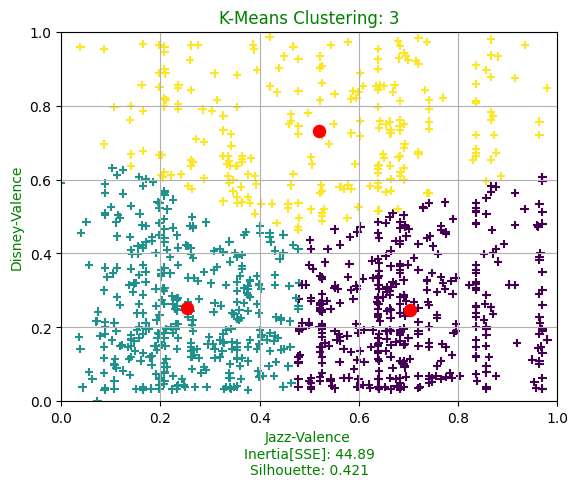

In [ ]:
### Lower Inertia = Good // Higher Inertia = Bad
### Silhouette Score >= 0.5 is reasonbly good clustering

silouette = metrics.silhouette_score(jazz_and_disney_valence_df_numpy,
                                     kmeans1.labels_, metric='euclidean')


centroids = kmeans1.cluster_centers_
plt.scatter(x=jazz_and_disney_valence_df_numpy[:, 0],
            y=jazz_and_disney_valence_df_numpy[:, 1],
                                          marker='+',
                                   c=kmeans1.labels_)

plt.scatter(x=centroids[:, 0], y=centroids[:, 1], marker='o', c='red', s=75)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(f'Jazz-Valence \nInertia[SSE]: {round(kmeans1.inertia_, 2)}\
\nSilhouette: {round(silouette,4)}', c='g')
plt.ylabel('Disney-Valence',c='g')
plt.title(f'K-Means Clustering: {3}', c='g')
plt.grid(True)
plt.show()

## Metal & Disney Valence

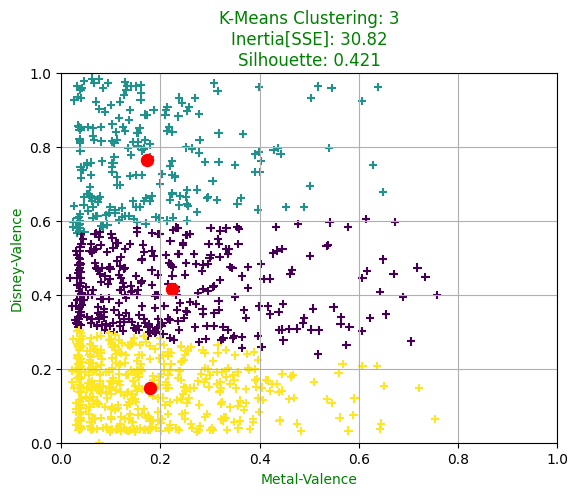

In [ ]:
# Lower Inertia = Good // Higher Inertia = Bad
### Silhouette Score >= 0.5 is reasonbly good clustering

silhouette2 = metrics.silhouette_score(jazz_and_disney_valence_df_numpy, kmeans1.labels_, metric='euclidean')
silhouette2

centroids = kmeans2.cluster_centers_
plt.scatter(x=metal_disney_Val_NP[:, 0], y=metal_disney_Val_NP[:, 1], marker='+' ,c=kmeans2.labels_)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], marker='o', c='red', s=75)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(f'Metal-Valence', c='g')
plt.ylabel('Disney-Valence',c='g')
plt.title(f'K-Means Clustering: {3}\nInertia[SSE]: {round(kmeans2.inertia_, 2)}\
\nSilhouette: {round(silhouette2,4)}', c='g')
plt.grid(True)
plt.show()

### For Loop Iteration

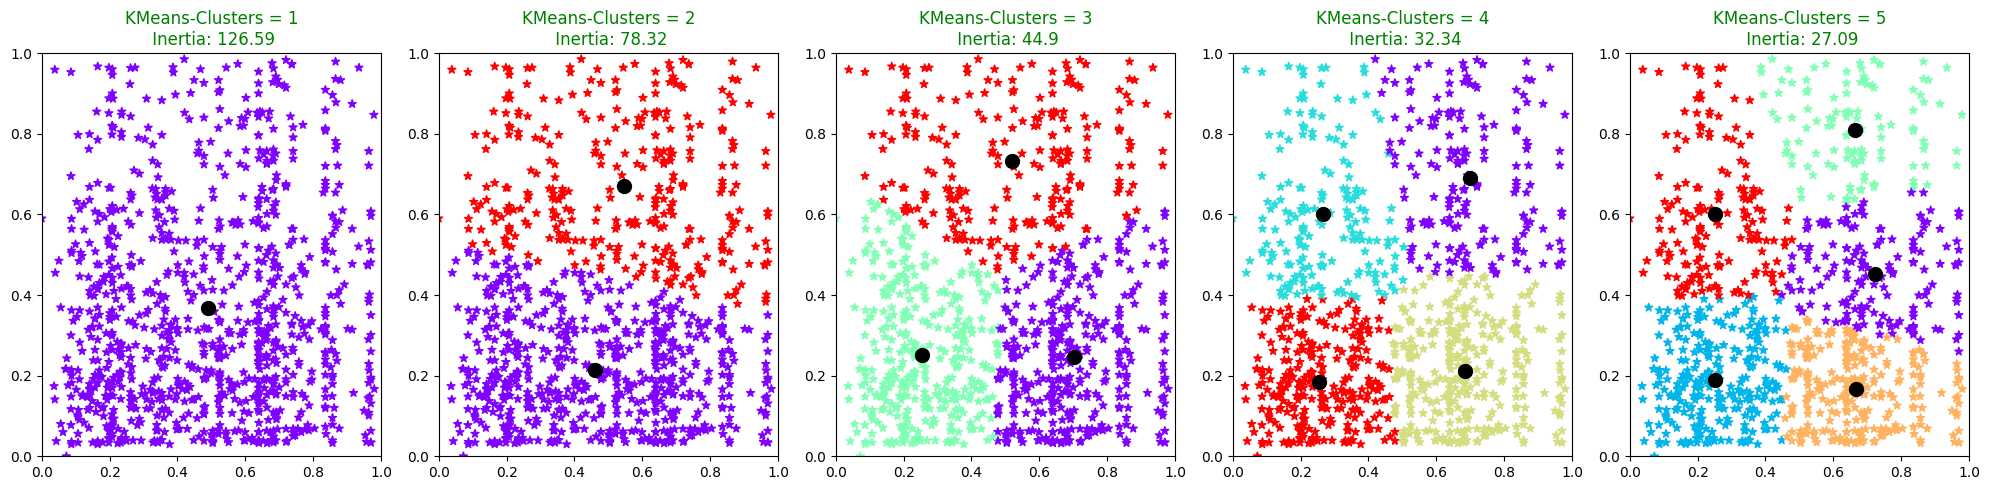

In [ ]:
## Showcasing K-Means Cluster Graphs [1-5]
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(jazz_and_disney_valence_df_numpy)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    ax = axs[k - 1]
    ax.scatter(
                x = jazz_and_disney_valence_df_numpy[:, 0],
                y = jazz_and_disney_valence_df_numpy[:, 1],
                c=labels, marker='*', cmap= 'rainbow'
              )
    ax.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker='o', c='black', s=100)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    ax.set_title(f'KMeans-Clusters = {k}\n Inertia: {round(kmeans.inertia_, 2)}', c='g')
    plt.tight_layout()

plt.tight_layout()
plt.show()



# Made Function For Automating KMeans

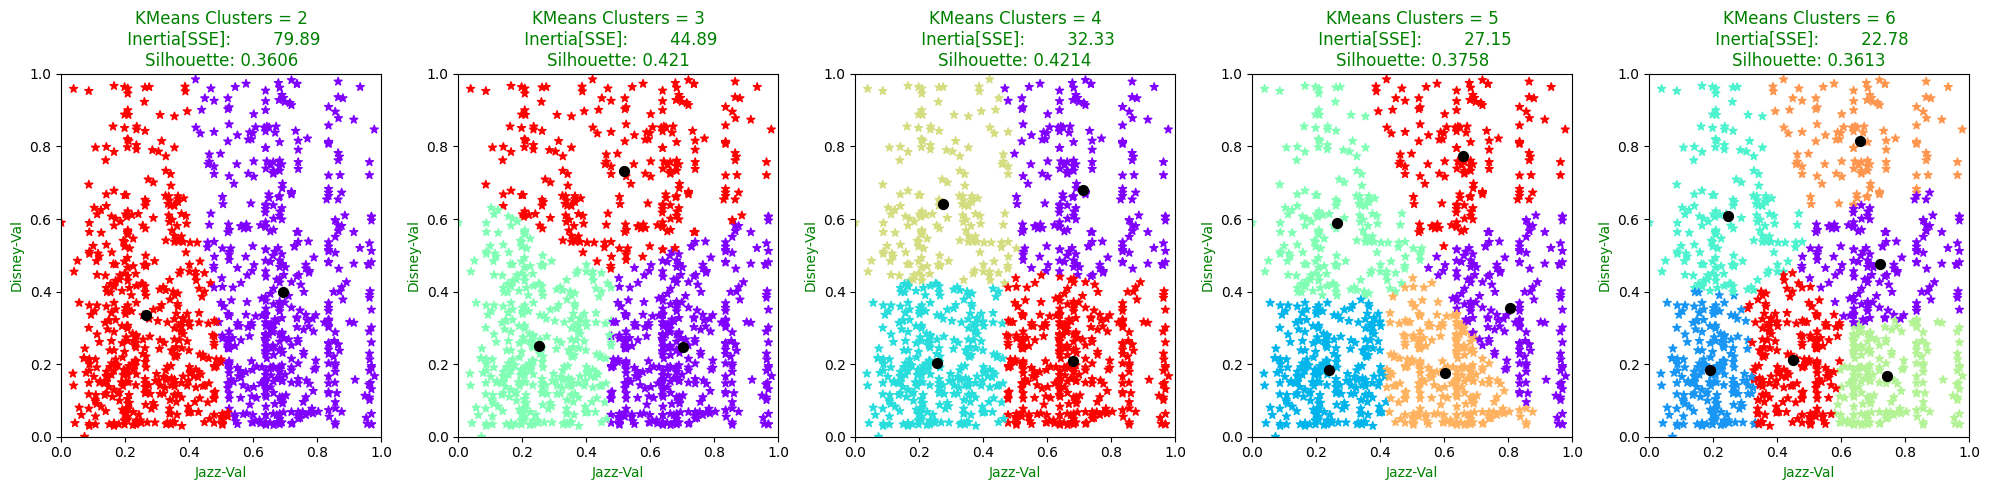

In [ ]:
## Test Function to take any dataframe and convert it into KMean cluster data
#  w/ the use of numpy and with 5 Graphs as a showcase
### Function Works

# Passes a parameter [Any DataFrame]

def Data_To_KMEANS(data):
    from sklearn.cluster import KMeans
    from matplotlib import pyplot as plt
    import numpy as np

    # This is where we set our column titles to be used dynamically depending
    # on the dataframe
    ax_titles = data.columns

    # Taking the dataframe and converting into a numpy array variable.
    valence_data = data.to_numpy()

    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
    for k in range(2, 7):
        # Setting up and modeling for KMeans
        # Our clusters iterate with the help of a for loop
        kmeans = KMeans(n_clusters=k,
                        random_state=250,
                        verbose=0,
                        n_init="auto")

        kmeans.fit(valence_data)
        labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_
        silhouette = metrics.silhouette_score(valence_data,
                                                    labels,
                                                    metric='euclidean')

        # Plotting the scatter for each graph by number of clusters
        ax = axs[k - 2]
        ax.scatter(
                    # This can be altered depending on the dataset.
                    x = valence_data[:, 0],
                    y = valence_data[:, 1],
                          c=labels,
                        marker='*',
                    cmap= 'rainbow'
                  )
        ax.scatter(x=cluster_centers[:, 0],
                   y=cluster_centers[:, 1],
                                marker='o',
                                 c='black',
                                      s=50)

        # Setting our axis limit to match with our scales of Energy & Dance
        # Can be altered depending on the range you need
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        # Formatting to allow within the graph clusters and inertia results
        ax.set_xlabel(f'{ax_titles[0]}', c='g')
        ax.set_ylabel(f'{ax_titles[1]}', c='g')
        ax.set_title(f'KMeans Clusters = {k}\n Inertia[SSE]:\
        {round(kmeans.inertia_, 2)}\nSilhouette: {round(silhouette,4)}',c='g')
        plt.tight_layout()

# Plotting our function call with our DataFrame passed as an argument
plt.show(Data_To_KMEANS(jazz_and_disney_valence_df))

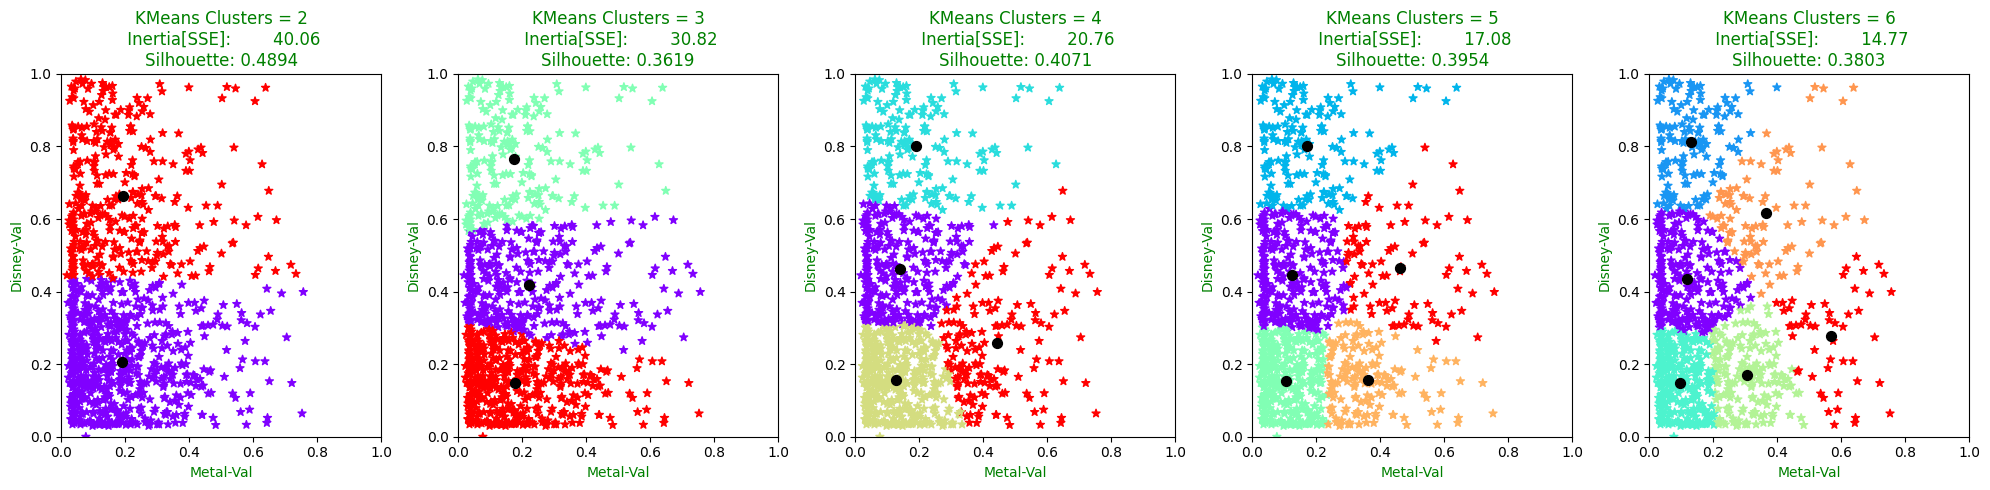

In [ ]:
plt.show(Data_To_KMEANS(metal_disney_Val))

# K-Nearest-Neighbor Algorithm

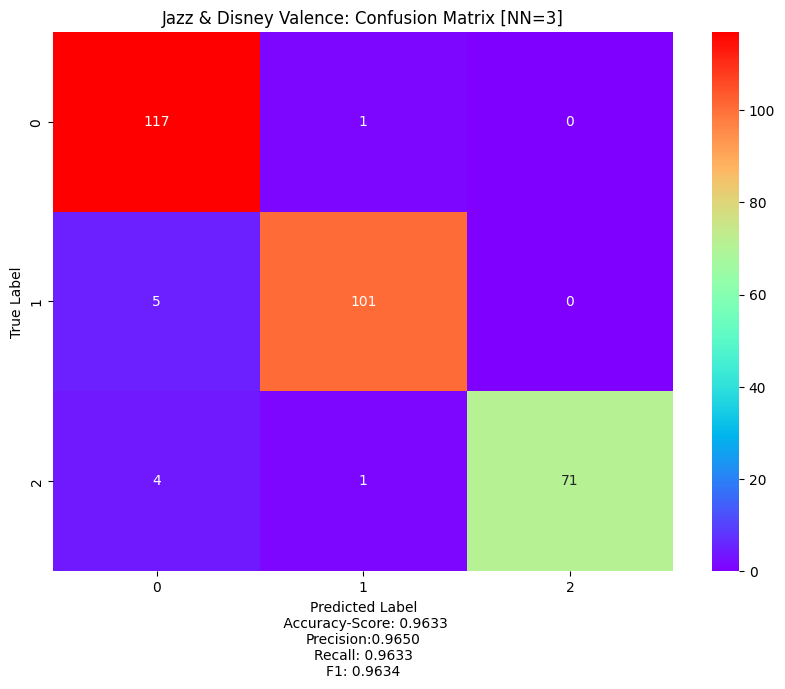

In [ ]:
###____________________K-Nearest-Neighbor Portion____________________________###
# Setting our variables up to be trained for our K-NN testing
x_train, x_test, y_train, y_test = train_test_split(jazz_and_disney_valence_df_numpy,
                                               kmeans1.labels_,
                                               test_size=0.3, random_state=42)

## This is for our KNN function at the very bottom
knn_data = [x_train, x_test, y_train, y_test]

# Modeling The Data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy from the confusion matrix
# Sum of diagonal elements (correct predictions) divided by total sum
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

# Precision, Recall, and F1 Score Metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Plotting our confusion matrix
plt.figure(figsize=(10,7))
# Plotting a 'heatmap' to better illustrate our confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
plt.title('Jazz & Disney Valence: Confusion Matrix [NN=3]')
plt.ylabel('True Label')
plt.xlabel(f'Predicted Label\n Accuracy-Score: {accuracy:.4f}\nPrecision:\
{precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}')

plt.show()


## For Loop Iteration

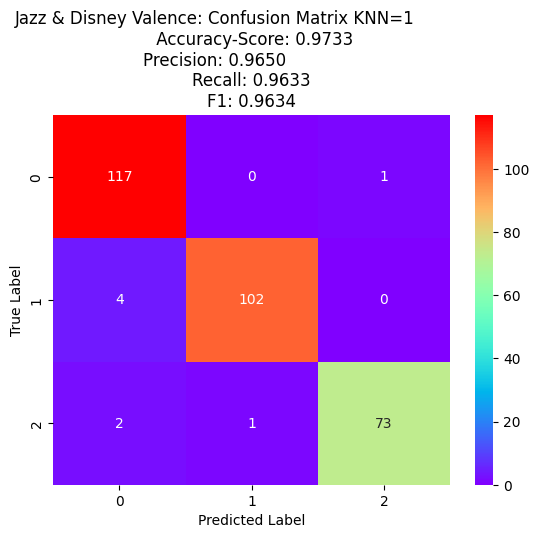

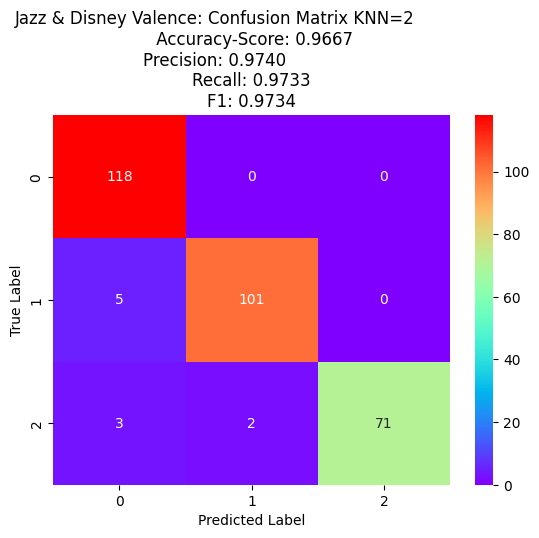

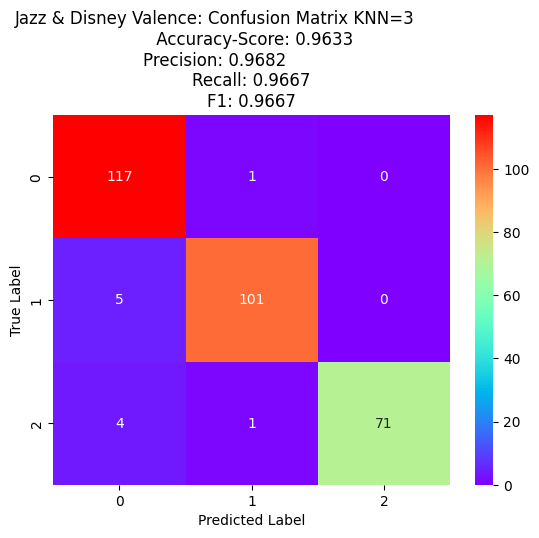

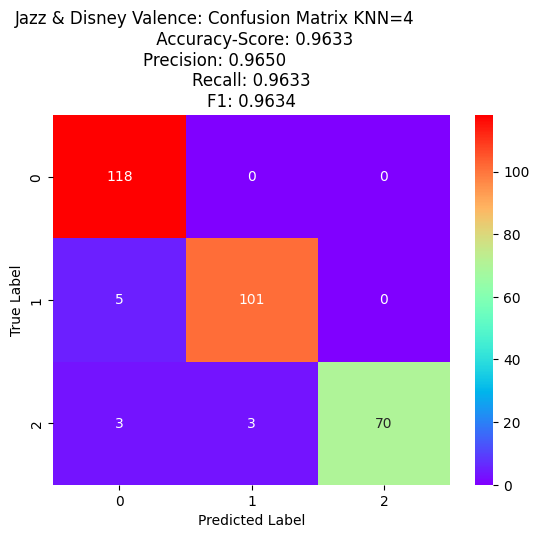

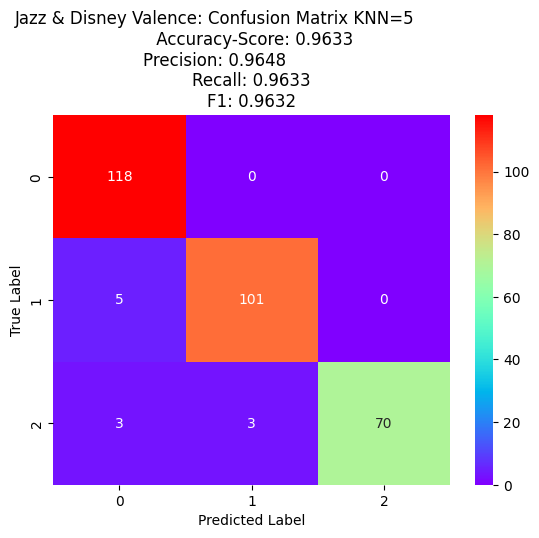

In [ ]:
# how many n_neighbors from 1->5 from our iteration of 'k'

for k in range(1, 6):
    ## Setting up our Data To Train
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    ## Accuracy Per Matrix is under each Graph
    # Creating a heatmap visualization of the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    plt.title(f'Jazz & Disney Valence: Confusion Matrix KNN={k}\
              \n Accuracy-Score: {accuracy:.4f}\nPrecision: {precision:.4f}\
              \nRecall: {recall:.4f}\nF1: {f1:.4f}')
    plt.ylabel('True Label')

    # Precision, Recall, and F1 Score Metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    plt.xlabel('Predicted Label')

    plt.show()

# Made Function For Automating K-NN

In [ ]:
## Function that takes a dataframe, for loop iterations of k, setting that
# to our n_neighbors call and showing the first 5 confusion matrices
def Data_To_KNN(data):
  import seaborn as sns
  from sklearn import metrics
  from sklearn.cluster import KMeans
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import ConfusionMatrixDisplay
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import precision_score, recall_score, f1_score
  ## Taking our Dataframe, setting our columns to be used as a dynamic title
  columns2 = data.columns

  ## Converting our dataframe to a numpy array for better handling of the data.
  valence2_data = data.to_numpy()
  labels = kmeans1.labels_

  for k in range(1, 6):
    # Setting our variables up to be trained for our K-NN testing
    x_train, x_test, y_train, y_test = train_test_split(valence2_data,
                                                               labels,
                                                        test_size=0.3,
                                                      random_state=42)


    ## This is for our KNN function at the very bottom
    nn_data = [x_train, x_test, y_train, y_test]
    ## Setting up our Data To Train
    ## Pulling from 'knn_data' array a few cells above by indexing
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(nn_data[0], nn_data[2])
    y_prediction = model.predict(nn_data[1])
    cm = confusion_matrix(nn_data[3], y_prediction)

    ## Accuracy Per Matrix is under each Graph
    # Creating a heatmap visualization of the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow')
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)

    # Precision, Recall, and F1 Score Metrics
    precision = precision_score(nn_data[3], y_prediction, average='weighted')
    recall = recall_score(nn_data[3], y_prediction, average='weighted')
    f1 = f1_score(nn_data[3], y_prediction, average='weighted')


    plt.title(f"Confusion Matrix\n{columns2[0]} & {columns2[1]}\
    K-NN={k}\n Accuracy-Score: {accuracy:.4f}\nPrecision: {precision:.4f}\n\
    Recall:{recall:.4f}\nF1: {f1:.4f}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    plt.show()

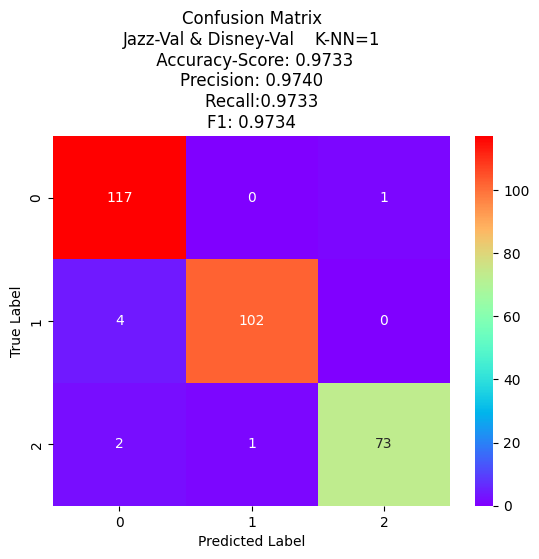

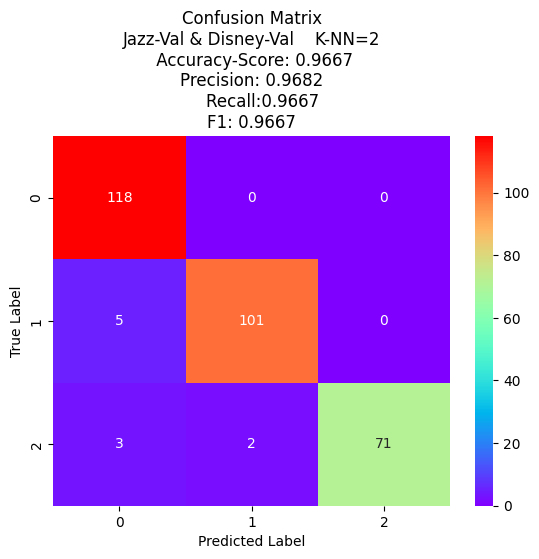

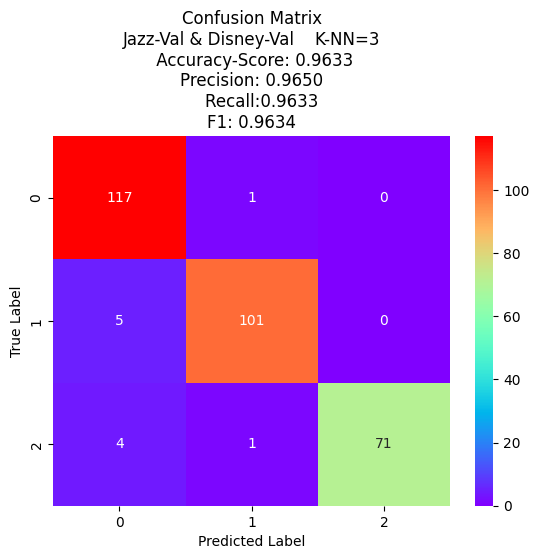

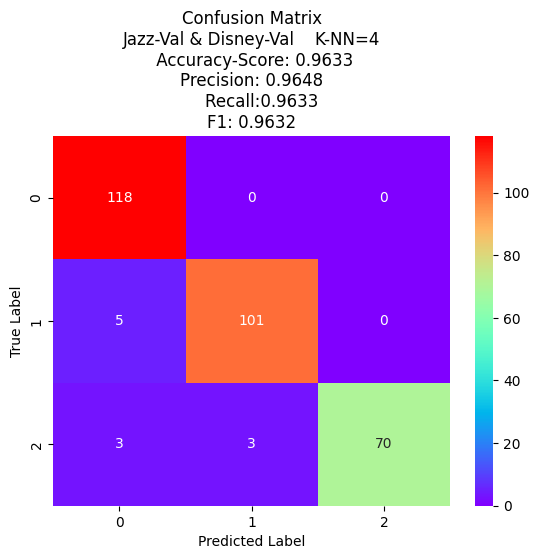

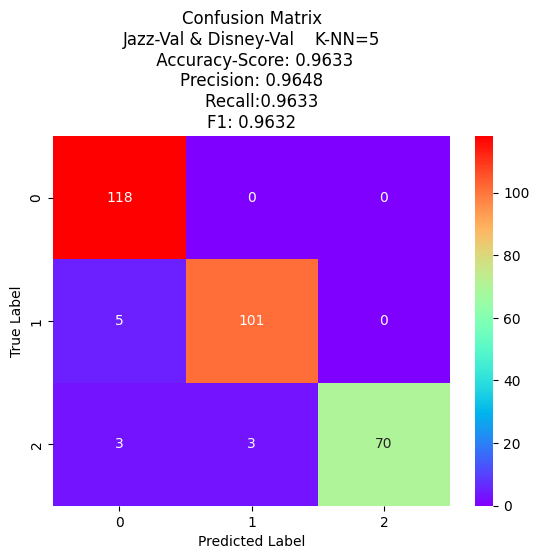

In [ ]:
Data_To_KNN(jazz_and_disney_valence_df)

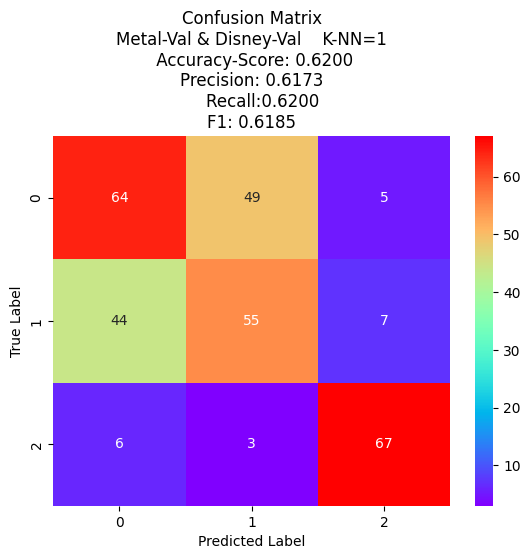

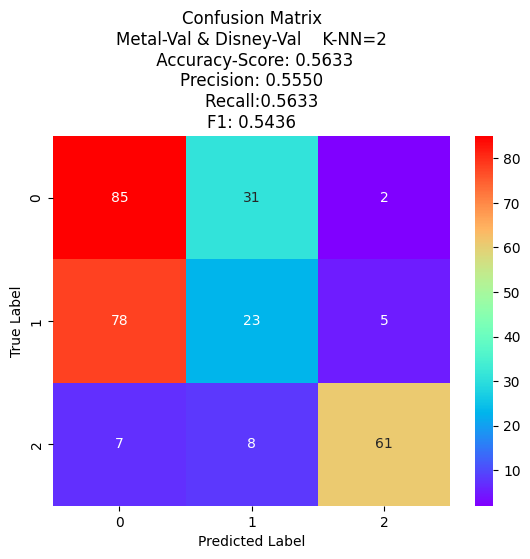

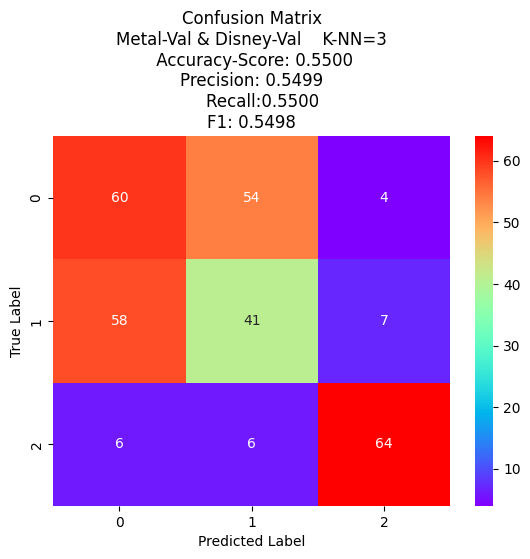

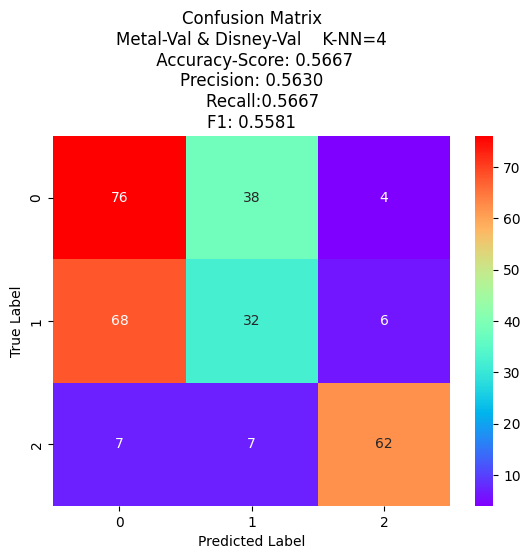

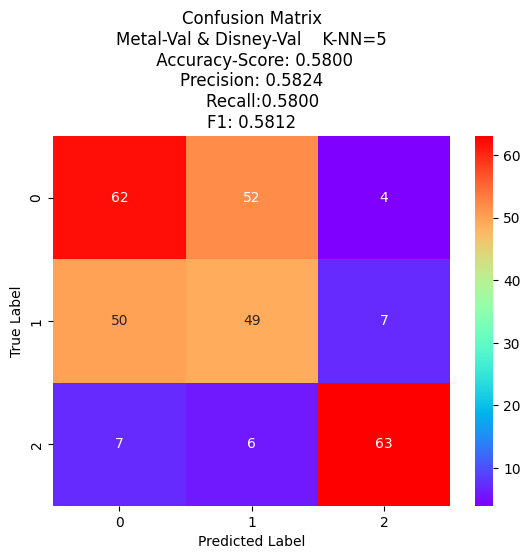

In [ ]:
Data_To_KNN(metal_disney_Val)

# Silouette Optimization Graphing

In [ ]:
## Score >= 0.5 is reasonbly good clustering
#  Setting up our silouette score within a for loop to determine what the
#  Silo score will be based on the number of clusters you pick.
silo = {}
silo_2 = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init= "k-means++", max_iter=250)
    kmeans.fit(jazz_and_disney_valence_df_numpy)
    silo[i] = metrics.silhouette_score(jazz_and_disney_valence_df_numpy,
                                       kmeans.labels_)

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init= "k-means++", max_iter=250)
    kmeans.fit(metal_disney_Val_NP)
    silo_2[i] = metrics.silhouette_score(metal_disney_Val_NP, kmeans.labels_)

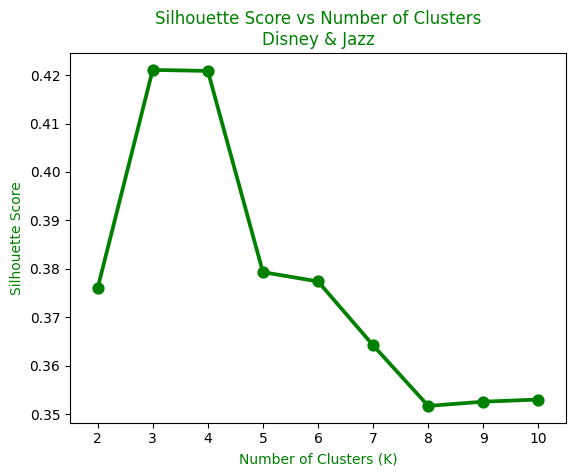

In [ ]:
## Score >= 0.5 is reasonbly good clustering
## Plotting Our silouette score against 'n' number of clusters
sns.pointplot(x=list(silo.keys()), y=list(silo.values()),c='g',marker='o')
plt.xlabel("Number of Clusters (K)",c='g')
plt.ylabel("Silhouette Score", c='g')
plt.title("Silhouette Score vs Number of Clusters\nDisney & Jazz", c='g')
plt.show()

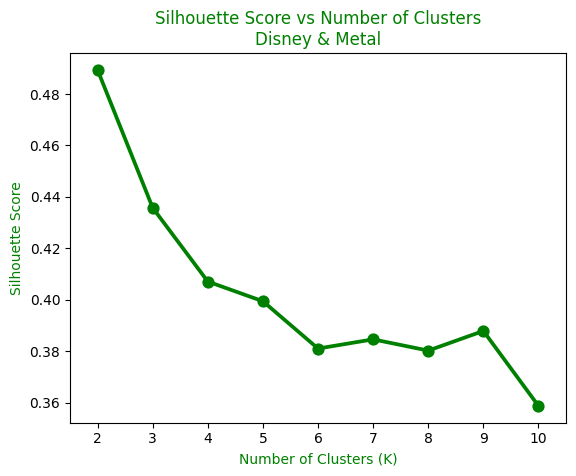

In [ ]:
## Score >= 0.5 is reasonbly good clustering
## Plotting Our silouette score against 'n' number of clusters
sns.pointplot(x=list(silo_2.keys()), y=list(silo_2.values()),c='g',marker='o')
plt.xlabel("Number of Clusters (K)",c='g')
plt.ylabel("Silhouette Score", c='g')
plt.title("Silhouette Score vs Number of Clusters\nDisney & Metal", c='g')
plt.show()

# Cluster Optimization Graphing

In [ ]:
# Function that displays the optimal cluster's to choose
## Takes in any dataFrame.to_numpy() with a user input amount of kloosters
def opt_k_means(data, max_kloosters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    columns3 = data.columns
    valence_data3 = data.to_numpy()

    means = []
    inertias = []
    for k in range(1, max_kloosters):
        ## This is where we are setting up and modeling our kmeans data.
        ## Clusters increase as our for loop iterates
        kmns = KMeans(n_clusters=k)
        kmns.fit(valence_data3)
        means.append(k)
        ## Applying an .interia_ call to append our inertia list for plotting
        inertias.append(kmns.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, '--gD')
    plt.xlabel('Number of clusters', c='g')
    plt.ylabel('Inertia [SSE]', c='g')
    plt.title(f'Elbow Method - Spotify DataFrame\nValence Cluster Optimization\
    \n{columns3[0]} & {columns3[1]}', c='g')
    plt.grid(True)
    plt.show()

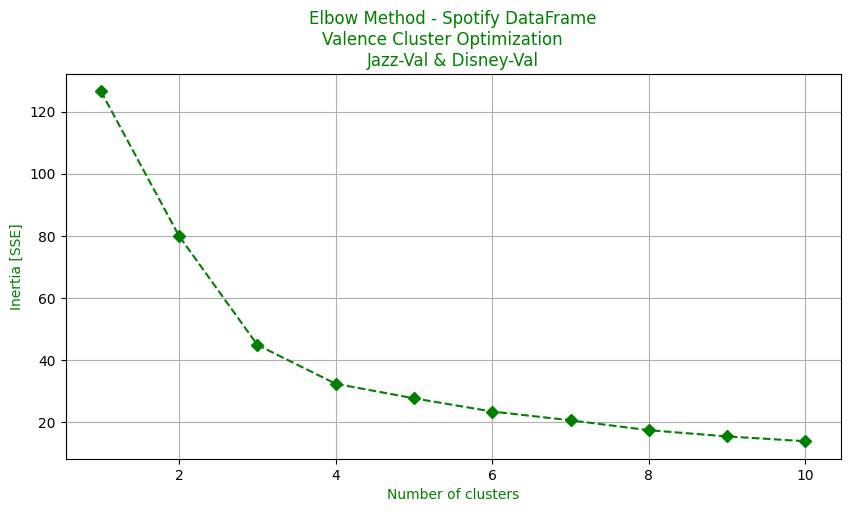

In [ ]:
## Testing our Optimized Cluster Function [Elbow Method]
opt_k_means(jazz_and_disney_valence_df, 11)

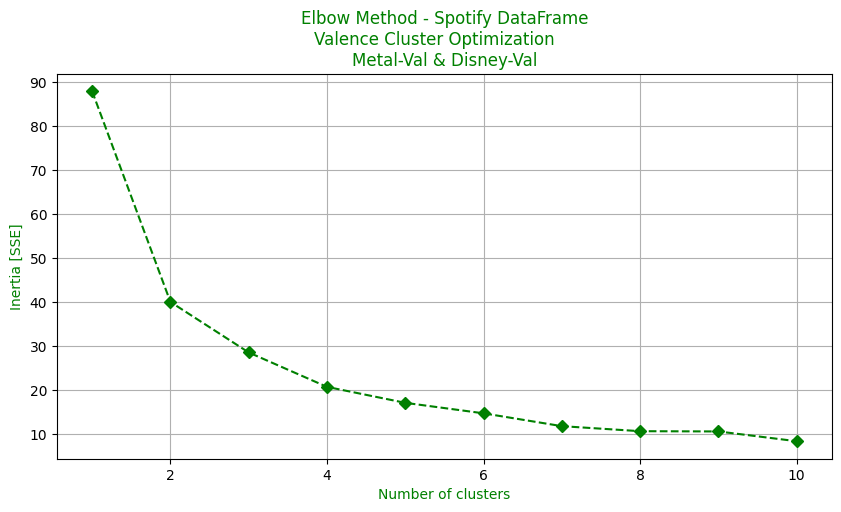

In [ ]:
opt_k_means(metal_disney_Val, 11)